# 美国2012年总统候选人政治献金数据分析

导入包

In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

方便大家操作，将月份和参选人以及所在政党进行定义

In [6]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
['Democrat', 'Libertarian', 'Reform', 'Republican']

['Democrat', 'Libertarian', 'Reform', 'Republican']

读取文件

In [7]:
data = pd.read_csv('../data/usa_election.csv',low_memory=False)
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [8]:
type(data)

pandas.core.frame.DataFrame

【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [9]:
# 创建的字典
parties

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [10]:
data['party'] = data['cand_nm'].map(parties)
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


查看单独一行，是否加上了'party'一列

In [11]:
data['party']

0         Republican
1         Republican
2         Republican
3         Republican
4         Republican
5         Republican
6         Republican
7         Republican
8         Republican
9         Republican
10        Republican
11        Republican
12        Republican
13        Republican
14        Republican
15        Republican
16        Republican
17        Republican
18        Republican
19        Republican
20        Republican
21        Republican
22        Republican
23        Republican
24        Republican
25        Republican
26        Republican
27        Republican
28        Republican
29        Republican
             ...    
536011    Republican
536012    Republican
536013    Republican
536014    Republican
536015    Republican
536016    Republican
536017    Republican
536018    Republican
536019    Republican
536020    Republican
536021    Republican
536022    Republican
536023    Republican
536024    Republican
536025    Republican
536026    Republican
536027    Rep

使用np.unique()函数查看colums：party这一列中有哪些元素

In [12]:
np.unique(data['party'])

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [13]:
data['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [14]:
group_party = data.groupby('party').sum()
group_party[['contb_receipt_amt']]

,contb_receipt_amt
party,
Democrat,8.105758e+07
Libertarian,4.132769e+05
Reform,3.390338e+05
Republican,1.192255e+08


查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [15]:
group_party = data.groupby(['party','contb_receipt_dt']).sum()
group_party[['contb_receipt_amt']]

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   01-AUG-11                 175281.00
           01-DEC-11                 651532.82
           01-JAN-12                  58098.80
           01-JUL-11                 165961.00
           01-JUN-11                 145459.00
           01-MAY-11                  82644.00
           01-NOV-11                 122529.87
           01-OCT-11                 148977.00
           01-SEP-11                 403297.62
           02-AUG-11                 164510.11
           02-DEC-11                 216056.96
           02-JAN-12                  89743.60
           02-JUL-11                  17105.00
           02-JUN-11                 422453.00
           02-MAY-11                 396675.00
           02-NOV-11                 147183.81
           02-OCT-11                  62605.62
           02-SEP-11                 137948.41
           03-AUG-11                 147053.02
           03-DEC-11                  81304.02
           03-JAN-12                  87406.97
           03-JUL-11                   5982.00
           03-JUN-11                 320176.20
           03-MAY-11                 261819.11
           03-NOV-11                 119304.56
           03-OCT-11                 363061.02
           03-SEP-11                  45598.00
           04-APR-11                 640235.12
           04-AUG-11                 598784.23
           04-DEC-11                  72795.10
...                                        ...
Republican 29-AUG-11                 941769.23
           29-DEC-11                 428501.42
           29-JAN-11                    750.00
           29-JAN-12                  75220.02
           29-JUL-11                 233423.35
           29-JUN-11                1340704.29
           29-MAR-11                  38875.00
           29-MAY-11                   8363.20
           29-NOV-11                 407322.64
           29-OCT-11                  81924.01
           29-SEP-11                1612794.52
           30-APR-11                  43004.80
           30-AUG-11                 915548.58
           30-DEC-11                 492470.45
           30-JAN-12                 255204.80
           30-JUL-11                  12249.04
           30-JUN-11                2744932.63
           30-MAR-11                  50240.00
           30-MAY-11                  17803.60
           30-NOV-11                 809014.83
           30-OCT-11                  43913.16
           30-SEP-11                4886331.76
           31-AUG-11                1017735.02
           31-DEC-11                1094376.72
           31-JAN-11                   6000.00
           31-JAN-12                 869890.41
           31-JUL-11                  12781.02
           31-MAR-11                  62475.00
           31-MAY-11                 301339.80
           31-OCT-11                 734601.83

[1183 rows x 1 columns]

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [16]:
data.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [17]:
# 用于替换日期的字典
months

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [18]:
# 解析contb_receipt_dt这一列的字符串,并且替换
def change_str(n):
    list1 = str(n).split('-')
    list1[1] = months[list1[1]]
    # 再拼接回去
    str2 = '20' + str(list1[2])+ '-' + str(list1[1]) + '-' + str(list1[0])
    return str2
#     return pd.to_datetime(n)

In [19]:
data['contb_receipt_dt'] = data['contb_receipt_dt'].map(change_str)

查看是否转换成功

In [20]:
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-6-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,2011-8-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican


In [21]:
data['contb_receipt_dt'] = pd.to_datetime(data['contb_receipt_dt'])

In [22]:
data.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

将时间转换为时间数据类型  
根据时间进行排序

In [23]:
data = data.sort_values('contb_receipt_dt')
data

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478476,C00496067,P00003608,"Cain, Herman","ANDINGF, AL",MONONA,WI,537162503,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463851,C00496067,P00003608,"Cain, Herman","MANN, KEITH",UNIVERSITY PARK,FL,342012269,US ARMY,SOLDIER,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463850,C00496067,P00003608,"Cain, Herman","COOPER, ROBERT",ORLANDO,FL,328264121,TEAM HEALTH,PHYSICIAN,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [24]:
# 分组并且统计
group_data = data.groupby(['party','contb_receipt_dt']).sum()
# 取出献金那一列
group_data_amt = group_data[['contb_receipt_amt']]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [25]:
group_data_amt = group_data_amt.unstack(level=0)
group_data_amt

contb_receipt_amt                                  
party                     Democrat Libertarian    Reform  Republican
contb_receipt_dt                                                    
2011-01-01                     NaN         NaN       NaN     8600.00
2011-01-03                     NaN         NaN       NaN     4800.00
2011-01-04                     NaN         NaN       NaN     5000.00
2011-01-12                     NaN         NaN       NaN     4150.00
2011-01-13                     NaN         NaN       NaN     4000.00
2011-01-14                     NaN         NaN       NaN     6000.00
2011-01-15                     NaN         NaN       NaN      500.00
2011-01-16                     NaN         NaN       NaN      750.00
2011-01-17                     NaN         NaN       NaN      500.00
2011-01-18                     NaN         NaN       NaN     4800.00
2011-01-20                     NaN         NaN       NaN     2650.00
2011-01-21                     NaN         NaN       NaN      250.00
2011-01-22                     NaN         NaN       NaN      250.00
2011-01-24                     NaN         NaN       NaN     2400.00
2011-01-26                     NaN         NaN       NaN     5400.00
2011-01-27                     NaN         NaN       NaN     2650.00
2011-01-28                     NaN         NaN       NaN      650.00
2011-01-29                     NaN         NaN       NaN      750.00
2011-01-31                     NaN         NaN       NaN     6000.00
2011-02-01                     NaN         NaN       NaN      250.00
2011-02-03                     NaN         NaN       NaN     3250.00
2011-02-04                     NaN         NaN       NaN     1000.00
2011-02-07                     NaN         NaN       NaN     9300.00
2011-02-08                     NaN         NaN       NaN     3000.00
2011-02-09                     NaN         NaN       NaN     6550.00
2011-02-10                     NaN         NaN       NaN      250.00
2011-02-11                     NaN         NaN       NaN      250.00
2011-02-12                     NaN         NaN       NaN      250.00
2011-02-13                     NaN         NaN       NaN      250.00
2011-02-14                     NaN         NaN       NaN     2500.00
...                            ...         ...       ...         ...
2012-01-02                89743.60         NaN   2437.13   114037.13
2012-01-03                87406.97         NaN   4006.32   155803.62
2012-01-04               166547.24         NaN   3445.80   577733.61
2012-01-05               198224.86         NaN   3925.48   451065.98
2012-01-06               138822.95         NaN  12676.24   262798.46
2012-01-07                91161.12         NaN   4201.12   148145.58
2012-01-08                81758.00         NaN   3457.52    84342.84
2012-01-09               206996.99         NaN   1950.00   501931.44
2012-01-10               191988.12         NaN   2195.00   487901.67
2012-01-11               185823.52         NaN    945.00   452916.99
2012-01-12               467212.53         NaN    625.00   348327.39
2012-01-13               374570.48         NaN    351.00   463368.26
2012-01-14                81687.80         NaN    200.00   608470.68
2012-01-15                72983.50         NaN    400.00   322194.08
2012-01-16               117163.21         NaN    400.00   367791.70
2012-01-17               298246.61         NaN     40.00   625365.77
2012-01-18               219002.47         NaN       NaN   888681.17
2012-01-19               275532.88         NaN     65.00  1066250.23
2012-01-20               245166.57         NaN    386.00   401298.03
2012-01-21                18513.50         NaN    280.00   374261.81
2012-01-22                67194.23         NaN    450.00   507168.71
2012-01-23               337307.07         NaN    225.00   645477.15
2012-01-24               458909.23         NaN    500.00   462233.66
2012-01-25               438949.32         NaN    282.00   416931.39
2012-01-26     

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

In [39]:
cumcum_amt.index

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-04', '2011-01-12',
               '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
               '2011-01-17', '2011-01-18',
               ...
               '2012-01-22', '2012-01-23', '2012-01-24', '2012-01-25',
               '2012-01-26', '2012-01-27', '2012-01-28', '2012-01-29',
               '2012-01-30', '2012-01-31'],
              dtype='datetime64[ns]', name='contb_receipt_dt', length=376, freq=None)

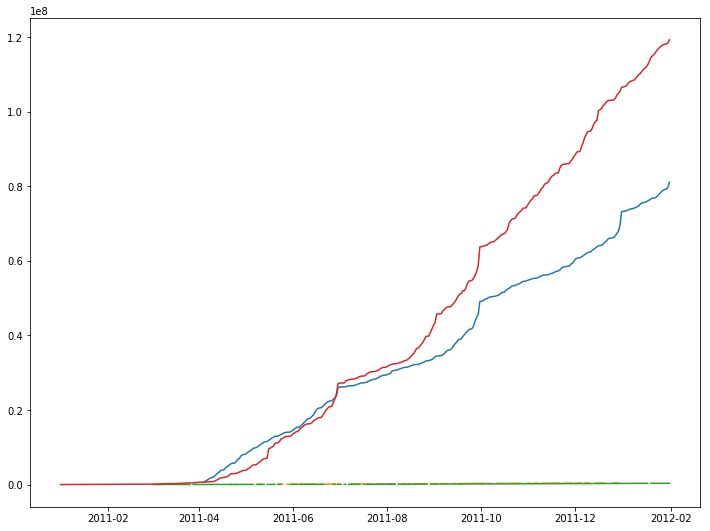

In [26]:
cumcum_amt = group_data_amt.cumsum(axis=0)
plt.figure(figsize=(12,9))
# 画图,传入的是data数据
plt.plot(cumcum_amt[['contb_receipt_amt']])
# plt.legend(['Democrat','Libertarian','Reform','Republican'])

In [27]:
cumcum_amt

contb_receipt_amt                                     
party                     Democrat Libertarian     Reform    Republican
contb_receipt_dt                                                       
2011-01-01                     NaN         NaN        NaN  8.600000e+03
2011-01-03                     NaN         NaN        NaN  1.340000e+04
2011-01-04                     NaN         NaN        NaN  1.840000e+04
2011-01-12                     NaN         NaN        NaN  2.255000e+04
2011-01-13                     NaN         NaN        NaN  2.655000e+04
2011-01-14                     NaN         NaN        NaN  3.255000e+04
2011-01-15                     NaN         NaN        NaN  3.305000e+04
2011-01-16                     NaN         NaN        NaN  3.380000e+04
2011-01-17                     NaN         NaN        NaN  3.430000e+04
2011-01-18                     NaN         NaN        NaN  3.910000e+04
2011-01-20                     NaN         NaN        NaN  4.175000e+04
2011-01-21                     NaN         NaN        NaN  4.200000e+04
2011-01-22                     NaN         NaN        NaN  4.225000e+04
2011-01-24                     NaN         NaN        NaN  4.465000e+04
2011-01-26                     NaN         NaN        NaN  5.005000e+04
2011-01-27                     NaN         NaN        NaN  5.270000e+04
2011-01-28                     NaN         NaN        NaN  5.335000e+04
2011-01-29                     NaN         NaN        NaN  5.410000e+04
2011-01-31                     NaN         NaN        NaN  6.010000e+04
2011-02-01                     NaN         NaN        NaN  6.035000e+04
2011-02-03                     NaN         NaN        NaN  6.360000e+04
2011-02-04                     NaN         NaN        NaN  6.460000e+04
2011-02-07                     NaN         NaN        NaN  7.390000e+04
2011-02-08                     NaN         NaN        NaN  7.690000e+04
2011-02-09                     NaN         NaN        NaN  8.345000e+04
2011-02-10                     NaN         NaN        NaN  8.370000e+04
2011-02-11                     NaN         NaN        NaN  8.395000e+04
2011-02-12                     NaN         NaN        NaN  8.420000e+04
2011-02-13                     NaN         NaN        NaN  8.445000e+04
2011-02-14                     NaN         NaN        NaN  8.695000e+04
...                            ...         ...        ...           ...
2012-01-02             73297353.35         NaN  294170.93  1.066971e+08
2012-01-03             73384760.32         NaN  298177.25  1.068529e+08
2012-01-04             73551307.56         NaN  301623.05  1.074306e+08
2012-01-05             73749532.42         NaN  305548.53  1.078817e+08
2012-01-06             73888355.37         NaN  318224.77  1.081445e+08
2012-01-07             73979516.49         NaN  322425.89  1.082926e+08
2012-01-08             74061274.49         NaN  325883.41  1.083770e+08
2012-01-09             74268271.48         NaN  327833.41  1.088789e+08
2012-01-10             74460259.60         NaN  330028.41  1.093668e+08
2012-01-11             74646083.12         NaN  330973.41  1.098197e+08
2012-01-12             75113295.65         NaN  331598.41  1.101681e+08
2012-01-13             75487866.13         NaN  331949.41  1.106314e+08
2012-01-14             75569553.93         NaN  332149.41  1.112399e+08
2012-01-15             75642537.43         NaN  332549.41  1.115621e+08
2012-01-16             75759700.64         NaN  332949.41  1.119299e+08
2012-01-17             76057947.25         NaN  332989.41  1.125552e+08
2012-01-18             76276949.72         NaN        NaN  1.134439e+08
2012-01-19             76552482.60         NaN  333054.41  1.145102e+08
2012-01-20             76797649.17         NaN  333440.41  1.149115e+08
2012-01-21             76816162.67         NaN  333720.41  1.152857e+08
2012-01-22             76883356.90         NaN  334170.41  1.157929e+08
2012-01-23             77220663.97         NaN  334395.41

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [28]:
# group_data_amt = group_data_amt.stack(level=1)
# 把时间作为列来观察
group_dt_amt = cumcum_amt.stack(level=1)
group_dt_amt2 = group_dt_amt.unstack(level=0)
group_dt_amt2

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       NaN        NaN        NaN        NaN   
Libertarian                    NaN        NaN        NaN        NaN   
Reform                         NaN        NaN        NaN        NaN   
Republican                  8600.0    13400.0    18400.0    22550.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                NaN        NaN        NaN        NaN        NaN   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                  NaN        NaN        NaN        NaN        NaN   
Republican          26550.0    32550.0    33050.0    33800.0    34300.0   

                                 ...                                   \
contb_receipt_dt 2011-01-18      ...         2012-01-22    2012-01-23   
party                            ...                                    
Democrat                NaN      ...       7.688336e+07  7.722066e+07   
Libertarian             NaN      ...                NaN           NaN   
Reform                  NaN      ...       3.341704e+05  3.343954e+05   
Republican          39100.0      ...       1.157929e+08  1.164384e+08   

                                                                          \
contb_receipt_dt    2012-01-24    2012-01-25    2012-01-26    2012-01-27   
party                                                                      
Democrat          7.767957e+07  7.811852e+07  7.856879e+07  7.887458e+07   
Libertarian                NaN           NaN           NaN           NaN   
Reform            3.348954e+05  3.351774e+05  3.352024e+05  3.383788e+05   
Republican        1.169006e+08  1.173175e+08  1.175740e+08  1.179424e+08   

                                                                          
contb_receipt_dt    2012-01-28    2012-01-29    2012-01-30    2012-01-31  
party                                                                     
Democrat          7.911007e+07  7.920325e+07  7.963917e+07  8.105758e+07  
Libertarian                NaN           NaN           NaN           NaN  
Reform            3.385538e+05  3.387538e+05  3.388838e+05  3.390338e+05  
Republican        1.180252e+08  1.181004e+08  1.183556e+08  1.192255e+08  

[4 rows x 376 columns]

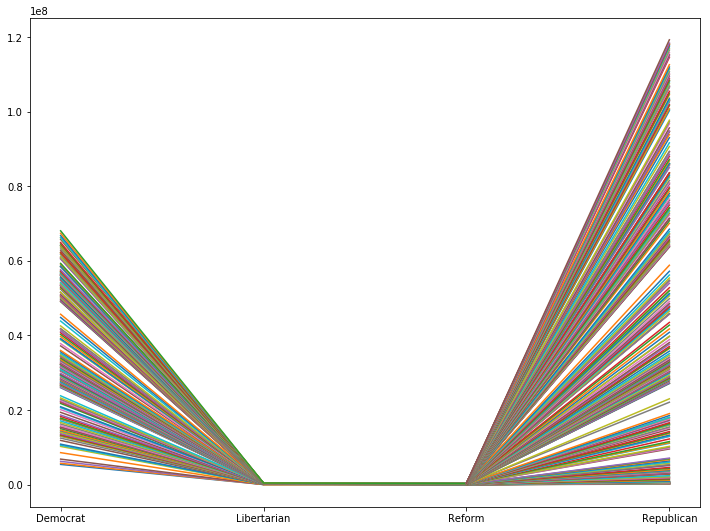

In [29]:
plt.figure(figsize=(12,9))
plt.plot(group_dt_amt2['contb_receipt_amt'])

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [30]:
group_dt_amt3 = group_dt_amt2.stack(level=0)
group_dt_amt3

,contb_receipt_dt,2011-01-01 00:00:00,2011-01-03 00:00:00,2011-01-04 00:00:00,2011-01-12 00:00:00,2011-01-13 00:00:00,2011-01-14 00:00:00,2011-01-15 00:00:00,2011-01-16 00:00:00,2011-01-17 00:00:00,2011-01-18 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,,,,,,,,,,,,,,,,,,
Democrat,contb_receipt_amt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.688336e+07,7.722066e+07,7.767957e+07,7.811852e+07,7.856879e+07,7.887458e+07,7.911007e+07,7.920325e+07,7.963917e+07,8.105758e+07
Libertarian,contb_receipt_amt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reform,contb_receipt_amt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.341704e+05,3.343954e+05,3.348954e+05,3.351774e+05,3.352024e+05,3.383788e+05,3.385538e+05,3.387538e+05,3.388838e+05,3.390338e+05
Republican,contb_receipt_amt,8600.0,13400.0,18400.0,22550.0,26550.0,32550.0,33050.0,33800.0,34300.0,39100.0,...,1.157929e+08,1.164384e+08,1.169006e+08,1.173175e+08,1.175740e+08,1.179424e+08,1.180252e+08,1.181004e+08,1.183556e+08,1.192255e+08


查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [31]:
na_occupation = data.groupby(['contbr_occupation']).sum()
na_occupation[['contb_receipt_amt']]

,contb_receipt_amt
contbr_occupation,
MIXED-MEDIA ARTIST / STORYTELLER,100.00
AREA VICE PRESIDENT,250.00
RESEARCH ASSOCIATE,100.00
TEACHER,500.00
THERAPIST,3900.00
(PART-TIME) SALES CONSULTANT & WRITER,285.00
(RETIRED),250.00
-,8085.00
--,425.00


In [32]:
na_occupation = data.groupby(['cand_nm']).sum()
na_occupation[['contb_receipt_amt']]

,contb_receipt_amt
cand_nm,
"Bachmann, Michelle",2.607916e+06
"Cain, Herman",7.010446e+06
"Gingrich, Newt",9.271751e+06
"Huntsman, Jon",3.200693e+06
"Johnson, Gary Earl",4.132769e+05
"McCotter, Thaddeus G",3.703000e+04
"Obama, Barack",8.105758e+07
"Paul, Ron",1.543576e+07
"Pawlenty, Timothy",4.238859e+06


查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [33]:
cond_veteran = data['contbr_occupation'] == 'DISABLED VETERAN'
# 找到了'DISABLED VETERAN' 的行
data[cond_veteran]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
210809,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-04-27,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
396211,C00495820,P80000748,"Paul, Ron","THORNELL, GARY ENOS MR.",BENTON,KY,420256409,NONE,DISABLED VETERAN,201.20,2011-06-05,NaN,NaN,NaN,SA17A,762896,Republican
464508,C00496067,P00003608,"Cain, Herman","ANDERSON, JOSEPH",GROVETOWN,GA,308134105,NONE,DISABLED VETERAN,100.00,2011-06-18,NaN,NaN,NaN,SA17A,755790,Republican
210810,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-06-23,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
185264,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,100.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
185140,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,85.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
420332,C00495820,P80000748,"Paul, Ron","CRAYCRAFT, SETH MR.",MIDDLETOWN,OH,450444916,DEPT OF VETERANS AFFAIRS,DISABLED VETERAN,20.12,2011-07-19,NaN,NaN,NaN,SA17A,763173,Republican
235014,C00431445,P80003338,"Obama, Barack","RORIE, FOREST",WADESBORO,NC,281707443,INFORMATION REQUESTED,DISABLED VETERAN,50.00,2011-07-22,NaN,NaN,NaN,SA17A,756218,Democrat
260154,C00431445,P80003338,"Obama, Barack","NOLAN, DIANA",SPRAKERS,NY,12166,DISABLED VETERAN,DISABLED VETERAN,50.00,2011-07-28,NaN,NaN,NaN,SA17A,756218,Democrat
184211,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668,RET ARMY,DISABLED VETERAN,100.00,2011-08-04,NaN,NaN,NaN,SA17A,756218,Democrat


把索引变成列,Series.reset_index()

In [34]:
group_dt_amt

,,contb_receipt_amt
contb_receipt_dt,party,
2011-01-01,Republican,8.600000e+03
2011-01-03,Republican,1.340000e+04
2011-01-04,Republican,1.840000e+04
2011-01-12,Republican,2.255000e+04
2011-01-13,Republican,2.655000e+04
2011-01-14,Republican,3.255000e+04
2011-01-15,Republican,3.305000e+04
2011-01-16,Republican,3.380000e+04
2011-01-17,Republican,3.430000e+04


In [35]:
# 将索引变成列
group_dt_amt.reset_index('contb_receipt_dt')

,contb_receipt_dt,contb_receipt_amt
party,,
Republican,2011-01-01,8.600000e+03
Republican,2011-01-03,1.340000e+04
Republican,2011-01-04,1.840000e+04
Republican,2011-01-12,2.255000e+04
Republican,2011-01-13,2.655000e+04
Republican,2011-01-14,3.255000e+04
Republican,2011-01-15,3.305000e+04
Republican,2011-01-16,3.380000e+04
Republican,2011-01-17,3.430000e+04


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [36]:
# 职业
occ = np.max(na_occupation[['contb_receipt_amt']])
occ

contb_receipt_amt    81057578.81
dtype: float64